In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [2]:
channels = pd.read_csv('./Dataset/channels.csv')
deliveries = pd.read_csv('./Dataset/deliveries.csv')
drivers = pd.read_csv('./Dataset/drivers.csv')
hubs = pd.read_csv('./Dataset/hubs.csv', encoding='ISO-8859-1')
orders = pd.read_csv('./Dataset/orders.csv')
payments = pd.read_csv('./Dataset/payments.csv')
stores = pd.read_csv('./Dataset/stores.csv', encoding='ISO-8859-1')

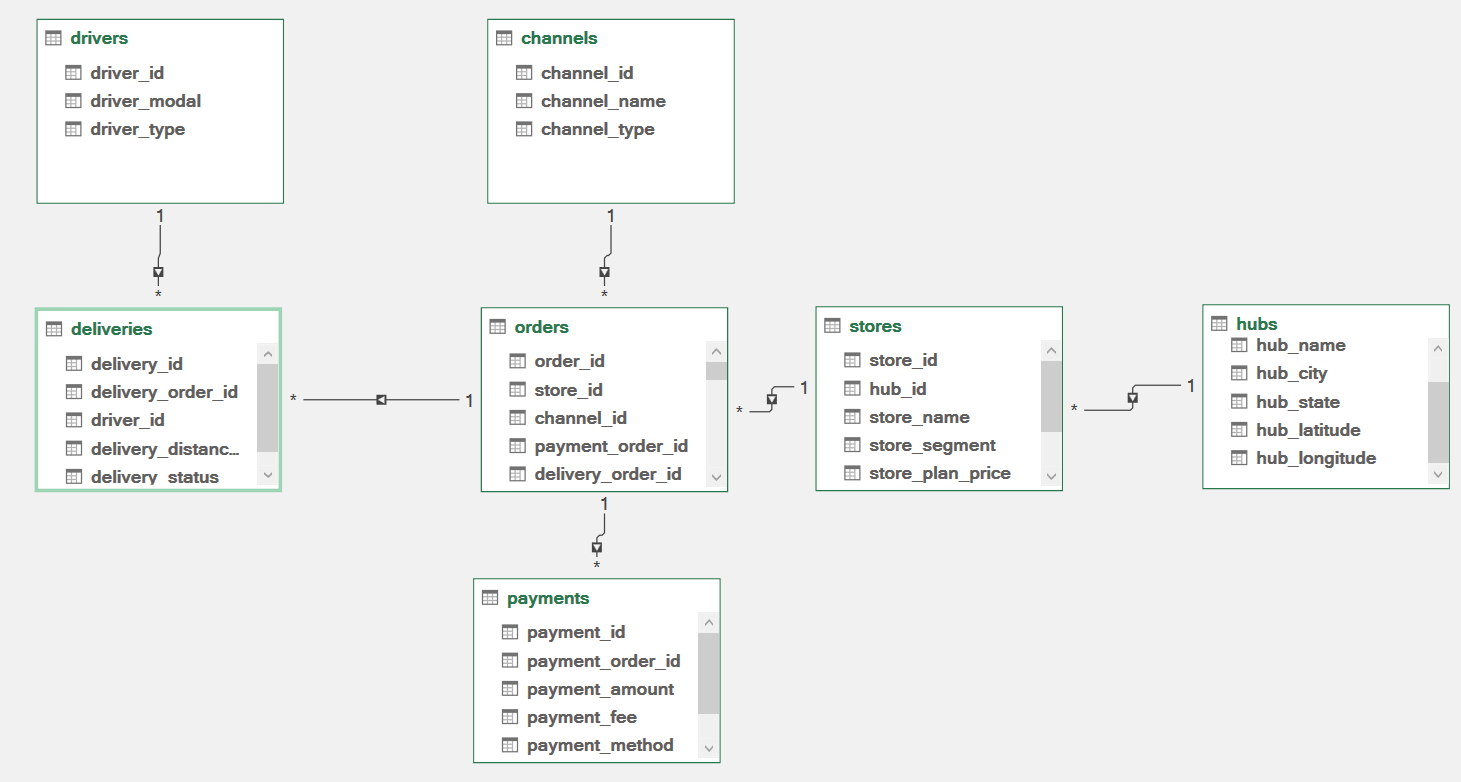

## channels

In [3]:
channels.head()

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE


In [4]:
channels.shape

(40, 3)

In [5]:
len(channels.channel_name.unique())

40

In [6]:
channels['channel_type'].unique()

array(['OWN CHANNEL', 'MARKETPLACE'], dtype=object)

In [7]:
channels['channel_type'].value_counts().reset_index()

,channel_type,count
0,MARKETPLACE,26
1,OWN CHANNEL,14


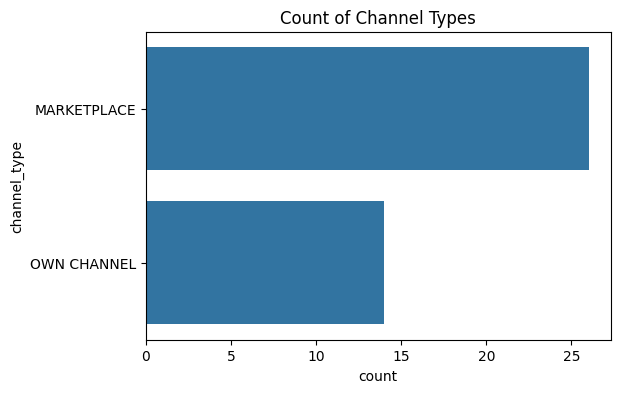

In [48]:
col_counts = channels['channel_type'].value_counts().reset_index()
plt.figure(figsize=(6, 4)) 
sns.barplot(x='count', y='channel_type', data=col_counts, orient='h')

# plt.xlabel('Channel Type')
# plt.ylabel('Count')
plt.title('Count of Channel Types')
plt.show()

In [9]:
channels.isnull().sum()

channel_id      0
channel_name    0
channel_type    0
dtype: int64

## drivers

In [10]:
drivers.shape

(4824, 3)

In [11]:
drivers.head()

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


In [12]:
drivers['driver_modal'].unique()

array(['MOTOBOY', 'BIKER'], dtype=object)

In [13]:
drivers['driver_type'].unique()

array(['LOGISTIC OPERATOR', 'FREELANCE'], dtype=object)

In [14]:
drivers.isnull().sum()

driver_id       0
driver_modal    0
driver_type     0
dtype: int64

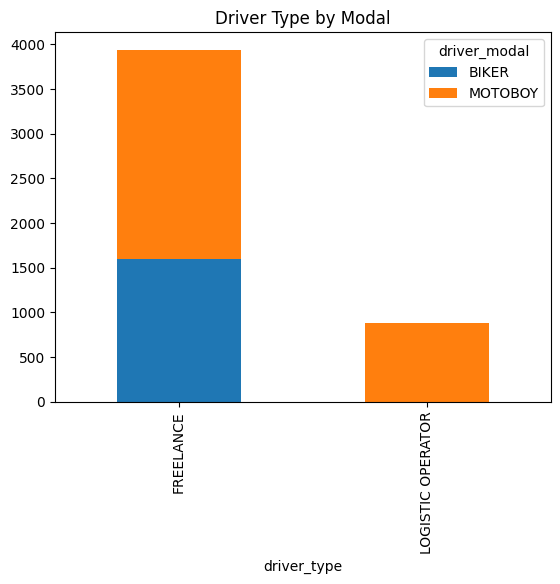

In [15]:
pd.crosstab(drivers['driver_type'], drivers['driver_modal']).plot(kind='bar', stacked=True)
plt.title('Driver Type by Modal')
plt.show()

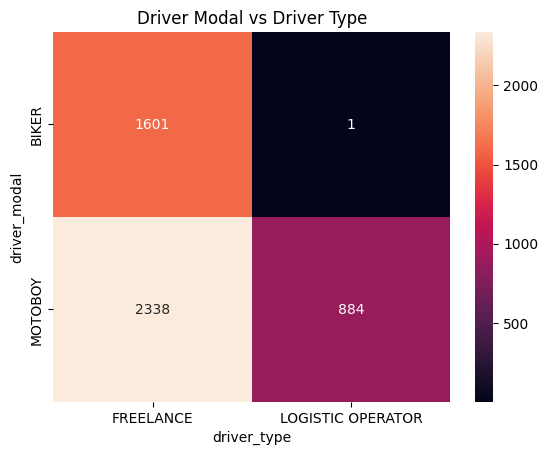

In [16]:
sns.heatmap(pd.crosstab(drivers['driver_modal'], drivers['driver_type']), annot=True, fmt='d')
plt.title('Driver Modal vs Driver Type')
plt.show()

## deliveries

In [17]:
deliveries.shape

(378843, 5)

In [18]:
deliveries.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


In [19]:
deliveries['delivery_status'].unique()

array(['DELIVERED', 'CANCELLED', 'DELIVERING'], dtype=object)

In [20]:
deliveries.isnull().sum()

delivery_id                     0
delivery_order_id               0
driver_id                   15886
delivery_distance_meters       73
delivery_status                 0
dtype: int64

In [21]:
deliveries['delivery_distance_meters'] = deliveries['delivery_distance_meters'].fillna(deliveries['delivery_distance_meters'].mean())

In [22]:
deliveries[deliveries['driver_id'].isnull()]


,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
7,2174695,68417783,NaN,2564.0,CANCELLED
63,2174845,68424547,NaN,2100.0,CANCELLED
79,2174883,68427057,NaN,2995.0,CANCELLED
149,2175046,68435678,NaN,3958.0,CANCELLED
232,2175267,68441760,NaN,1912.0,DELIVERED
...,...,...,...,...,...
378806,3108863,91142850,NaN,1542.0,DELIVERED
378807,3108867,91131547,NaN,684.0,DELIVERED
378808,3108868,91098770,NaN,2317.0,DELIVERED
378811,3111892,93139184,NaN,1116.0,DELIVERED


In [23]:
deliveries[deliveries['driver_id'].isnull()]['delivery_status'].unique()

array(['CANCELLED', 'DELIVERED', 'DELIVERING'], dtype=object)

## Orders

In [24]:
orders.shape

(368999, 29)

In [25]:
orders.sample(5)

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
242249,86583385,274,5,86583385,86583385,FINISHED,187.7,11.9,8.93,14,...,3/28/2021 2:37:42 PM,NaN,3/28/2021 2:50:35 PM,0.23,4.87,20.57,0.23,5.10,12.88,38.53
165525,82109934,3902,36,82109934,82109934,FINISHED,135.0,6.9,8.70,15,...,3/7/2021 3:37:46 PM,NaN,3/7/2021 3:48:03 PM,1.52,5.72,11.85,1.55,7.25,10.28,29.38
27229,70951784,1057,5,70951784,70951784,FINISHED,68.7,11.9,12.78,0,...,1/13/2021 12:49:35 AM,NaN,1/13/2021 1:09:52 AM,1.60,1.42,18.77,1.78,3.20,20.28,42.25
344541,92111209,261,5,92111209,92111209,FINISHED,20.0,6.9,3.79,19,...,4/23/2021 7:47:26 PM,NaN,4/23/2021 7:58:34 PM,0.32,1.35,2.38,1.57,2.92,11.13,16.43
253396,87074814,658,5,87074814,87074814,FINISHED,24.9,11.9,5.77,20,...,3/30/2021 8:29:12 PM,NaN,3/30/2021 8:47:29 PM,0.88,1.87,6.90,2.40,4.27,18.28,29.43


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           368999 non-null  int64  
 1   store_id                           368999 non-null  int64  
 2   channel_id                         368999 non-null  int64  
 3   payment_order_id                   368999 non-null  int64  
 4   delivery_order_id                  368999 non-null  int64  
 5   order_status                       368999 non-null  object 
 6   order_amount                       368999 non-null  float64
 7   order_delivery_fee                 368999 non-null  float64
 8   order_delivery_cost                361794 non-null  float64
 9   order_created_hour                 368999 non-null  int64  
 10  order_created_minute               368999 non-null  int64  
 11  order_created_day                  3689

In [27]:
orders.describe()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,order_created_minute,order_created_day,order_created_month,order_created_year,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
count,3.689990e+05,368999.000000,368999.000000,3.689990e+05,3.689990e+05,3.689990e+05,368999.000000,361794.000000,368999.000000,368999.000000,368999.000000,368999.000000,368999.0,317507.000000,297594.000000,343892.000000,294943.000000,334417.000000,343142.000000,353380.000000
mean,8.230726e+07,1197.796124,7.837929,8.230726e+07,8.230726e+07,1.051513e+02,6.178904,7.285869,16.719612,29.441210,15.965265,2.690690,2021.0,2.755433,9.185759,61.789895,4.773946,19.081852,46.849637,156.567920
std,7.037735e+06,1151.075389,8.298331,7.037735e+06,7.037735e+06,2.953111e+03,6.222460,4.075295,6.095596,17.223663,8.827469,1.100082,0.0,13.232567,65.722750,802.996121,17.578862,88.241935,752.577933,1224.987559
min,6.840512e+07,3.000000,1.000000,6.840512e+07,6.840512e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2021.0,-1.470000,-2728.350000,0.000000,-1.420000,-0.820000,-4.100000,0.330000
25%,7.635522e+07,415.000000,5.000000,7.635522e+07,7.635522e+07,3.990000e+01,0.000000,5.160000,15.000000,15.000000,8.000000,2.000000,2021.0,0.780000,1.170000,8.930000,2.150000,4.480000,11.830000,32.870000
50%,8.324599e+07,707.000000,5.000000,8.324599e+07,8.324599e+07,7.160000e+01,6.900000,7.190000,17.000000,29.000000,16.000000,3.000000,2021.0,1.670000,2.500000,15.170000,3.570000,6.600000,16.720000,42.230000
75%,8.803055e+07,1528.000000,5.000000,8.803055e+07,8.803055e+07,1.219000e+02,11.900000,8.720000,22.000000,44.000000,24.000000,4.000000,2021.0,3.030000,5.370000,22.230000,5.430000,10.330000,24.730000,55.670000
max,9.313982e+07,4679.000000,49.000000,9.313982e+07,9.313982e+07,1.788306e+06,990.110000,156.000000,23.000000,59.000000,31.000000,4.000000,2021.0,2050.400000,11712.280000,85662.030000,2735.520000,11718.200000,154261.100000,154277.320000


In [28]:
orders.isnull().sum()

order_id                                  0
store_id                                  0
channel_id                                0
payment_order_id                          0
delivery_order_id                         0
order_status                              0
order_amount                              0
order_delivery_fee                        0
order_delivery_cost                    7205
order_created_hour                        0
order_created_minute                      0
order_created_day                         0
order_created_month                       0
order_created_year                        0
order_moment_created                      0
order_moment_accepted                  9461
order_moment_ready                    25106
order_moment_collected                42894
order_moment_in_expedition            67429
order_moment_delivering               25316
order_moment_delivered               349398
order_moment_finished                 15599
order_metric_collected_time     

In [29]:
# orders['order_delivery_cost'] = orders['order_delivery_cost'].fillna(orders['order_delivery_cost'].mean())
# Identify numerical columns where you might consider mean imputation
numerical_cols_with_nulls = ['order_delivery_cost',
                             'order_metric_collected_time',
                             'order_metric_paused_time',
                             'order_metric_production_time',
                             'order_metric_walking_time',
                             'order_metric_expediton_speed_time',
                             'order_metric_transit_time',
                             'order_metric_cycle_time']

# Calculate the mean for each of these columns
mean_values = orders[numerical_cols_with_nulls].mean()

# Fill the missing values in these columns with their respective means
orders = orders.fillna(mean_values)

In [30]:
orders.isnull().sum()

order_id                                  0
store_id                                  0
channel_id                                0
payment_order_id                          0
delivery_order_id                         0
order_status                              0
order_amount                              0
order_delivery_fee                        0
order_delivery_cost                       0
order_created_hour                        0
order_created_minute                      0
order_created_day                         0
order_created_month                       0
order_created_year                        0
order_moment_created                      0
order_moment_accepted                  9461
order_moment_ready                    25106
order_moment_collected                42894
order_moment_in_expedition            67429
order_moment_delivering               25316
order_moment_delivered               349398
order_moment_finished                 15599
order_metric_collected_time     

In [31]:
orders.columns

Index(['order_id', 'store_id', 'channel_id', 'payment_order_id',
       'delivery_order_id', 'order_status', 'order_amount',
       'order_delivery_fee', 'order_delivery_cost', 'order_created_hour',
       'order_created_minute', 'order_created_day', 'order_created_month',
       'order_created_year', 'order_moment_created', 'order_moment_accepted',
       'order_moment_ready', 'order_moment_collected',
       'order_moment_in_expedition', 'order_moment_delivering',
       'order_moment_delivered', 'order_moment_finished',
       'order_metric_collected_time', 'order_metric_paused_time',
       'order_metric_production_time', 'order_metric_walking_time',
       'order_metric_expediton_speed_time', 'order_metric_transit_time',
       'order_metric_cycle_time'],
      dtype='object')

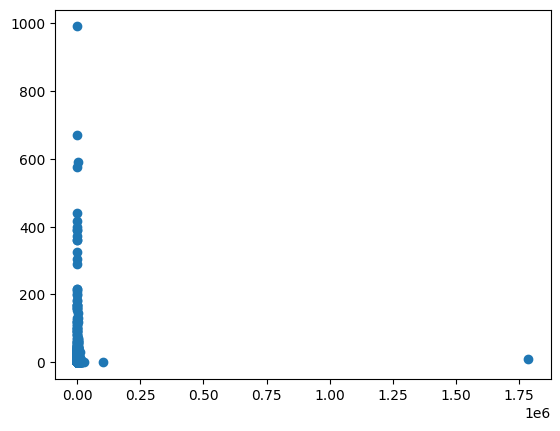

In [32]:
plt.scatter(orders['order_amount'], orders['order_delivery_fee']);

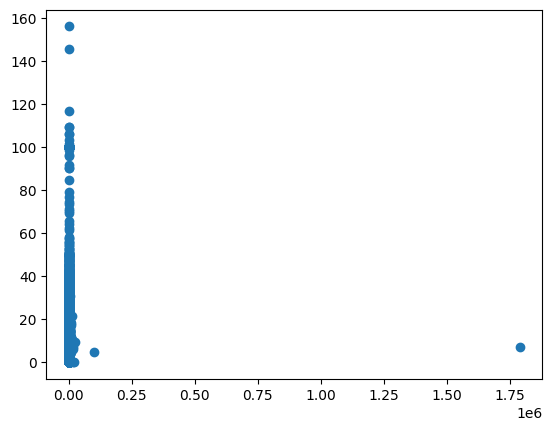

In [33]:
plt.scatter(orders['order_amount'], orders['order_delivery_cost']);


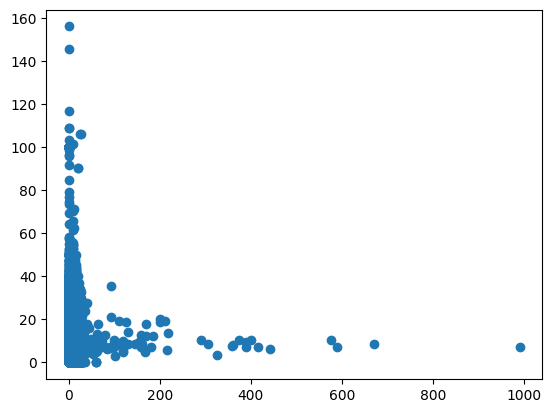

In [34]:
plt.scatter(orders['order_delivery_fee'], orders['order_delivery_cost']);


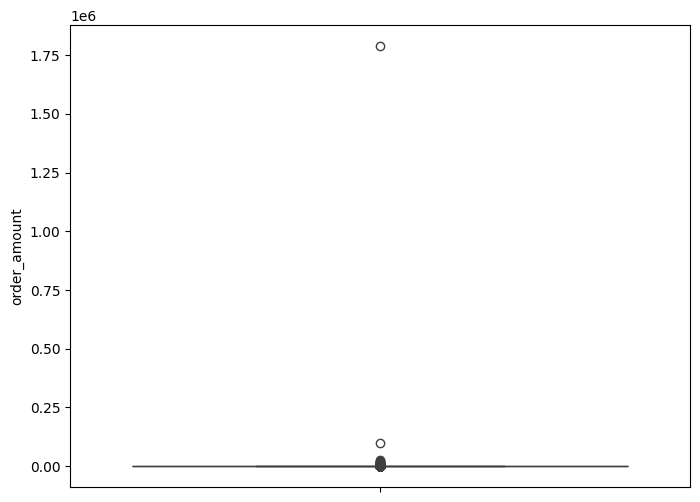

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=orders['order_amount']);

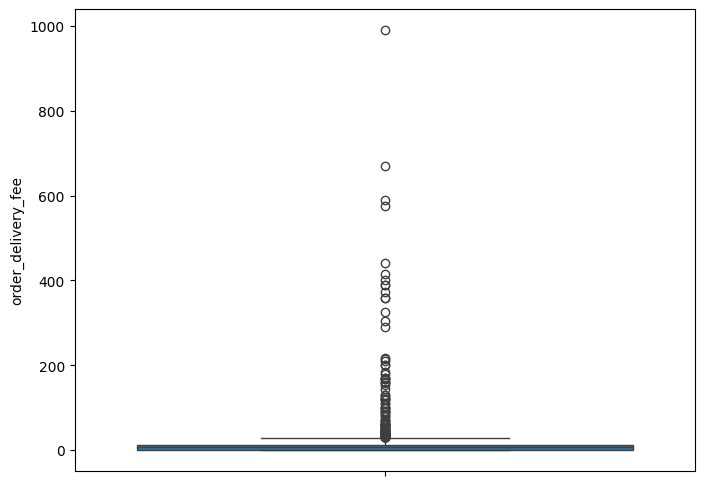

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=orders['order_delivery_fee']);

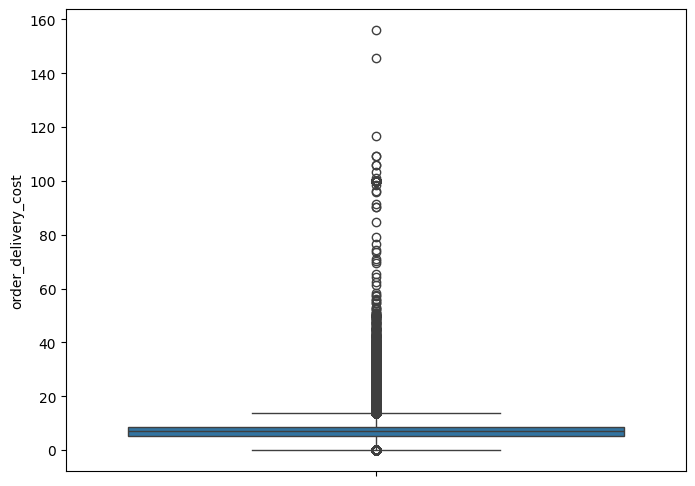

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=orders['order_delivery_cost']);

In [38]:
# --- Feature Engineering ---

# Profit Margin (handling potential NaNs in delivery_cost)
orders['profit_margin'] = orders['order_amount'] - orders['order_delivery_cost'].fillna(0)

# Delivery Profit
orders['delivery_profit'] = orders['order_delivery_fee'] - orders['order_delivery_cost'].fillna(0)

# Delivery Cost Percentage of Amount
# orders['delivery_cost_percentage'] = (orders['order_delivery_cost'].fillna(0) / orders['order_amount']) * 100

# High Value Order Flag
# median_order_amount = orders['order_amount'].median()
# orders['is_high_value'] = (orders['order_amount'] > median_order_amount).astype(int)

# print("\nDataFrame with Engineered Features:")
# print(orders[['order_id', 'order_amount', 'order_delivery_fee', 'order_delivery_cost', 'profit_margin', 'delivery_profit', 'delivery_cost_percentage', 'is_high_value']].head())

In [40]:
orders[['profit_margin', 'delivery_profit']]

,profit_margin,delivery_profit
0,55.414131,-7.285869
1,55.414131,-7.285869
2,108.214131,-7.285869
3,48.614131,-7.285869
4,30.614131,-7.285869
...,...,...
368994,28.000000,0.000000
368995,38.960000,1.860000
368996,119.410000,2.610000
368997,122.400000,6.900000


## payments

In [41]:
payments.shape

(400834, 6)

In [42]:
payments.head()

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID


In [43]:
for col in ['payment_method', 'payment_status']:
    print(f"Distinct values for column '{col}':")
    print(payments[col].unique())
    print("-" * 50)

Distinct values for column 'payment_method':
['VOUCHER' 'ONLINE' 'DEBIT' 'CREDIT' 'MEAL_BENEFIT' 'STORE_DIRECT_PAYMENT'
 'VOUCHER_STORE' 'DEBIT_STORE' 'CREDIT_STORE' 'VOUCHER_DC' 'MONEY'
 'PAYMENT_LINK' 'INSTALLMENT_CREDIT_STORE' 'VOUCHER_OL' 'BANK_TRANSFER_DC']
--------------------------------------------------
Distinct values for column 'payment_status':
['PAID' 'CHARGEBACK' 'AWAITING']
--------------------------------------------------


In [44]:
payments.isnull().sum()

payment_id            0
payment_order_id      0
payment_amount        0
payment_fee         175
payment_method        0
payment_status        0
dtype: int64

In [45]:
payments['payment_fee'].describe()

count    400659.000000
mean          1.880510
std           4.540013
min           0.000000
25%           0.440000
50%           1.040000
75%           2.710000
max        2000.000000
Name: payment_fee, dtype: float64

In [46]:
payments['payment_fee'].mode()

0    0.0
Name: payment_fee, dtype: float64

In [47]:
payments['payment_fee'] = payments['payment_fee'].fillna(payments['payment_fee'].mean())

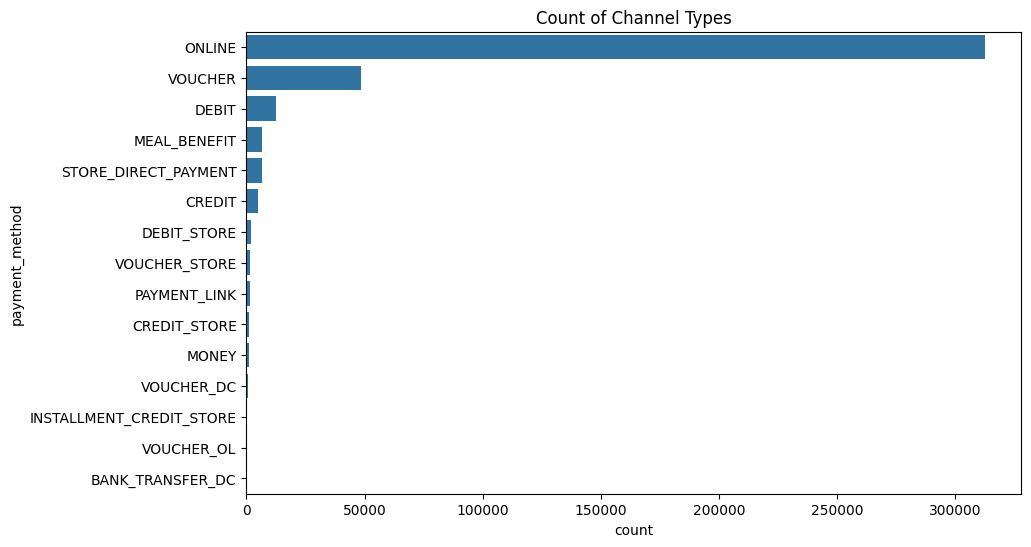

In [50]:
col_counts = payments['payment_method'].value_counts().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='count', y='payment_method', data=col_counts, orient='h')

# plt.xlabel('Channel Type')
# plt.ylabel('Count')
plt.title('Count of Channel Types')
plt.show()

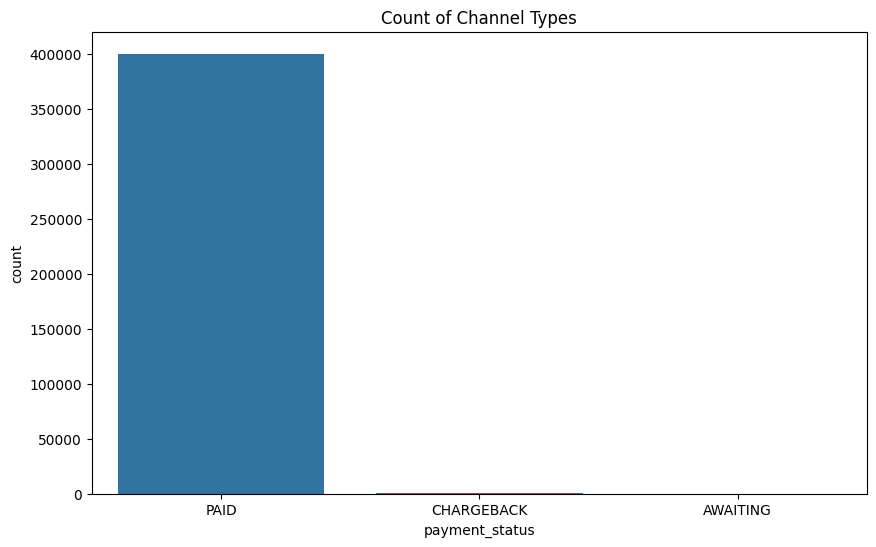

In [54]:
col_counts = payments['payment_status'].value_counts().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='payment_status', y='count', data=col_counts, orient='v')

# plt.xlabel('Channel Type')
# plt.ylabel('Count')
plt.title('Count of Channel Types')
plt.show()

## stores

In [55]:
stores.shape

(951, 7)

In [56]:
stores.head()

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


In [57]:
stores.store_segment.unique()

array(['FOOD', 'GOOD'], dtype=object)

In [58]:
stores.isnull().sum()

store_id              0
hub_id                0
store_name            0
store_segment         0
store_plan_price    115
store_latitude       16
store_longitude      16
dtype: int64

In [59]:
stores['store_plan_price'].describe()

count    836.000000
mean      34.816531
std       14.304086
min        0.000000
25%       29.000000
50%       29.900000
75%       49.000000
max       49.900000
Name: store_plan_price, dtype: float64

In [60]:
stores.store_plan_price.mode()

0    29.0
Name: store_plan_price, dtype: float64

In [61]:
stores['store_plan_price'] = stores['store_plan_price'].fillna(stores['store_plan_price'].mean())   

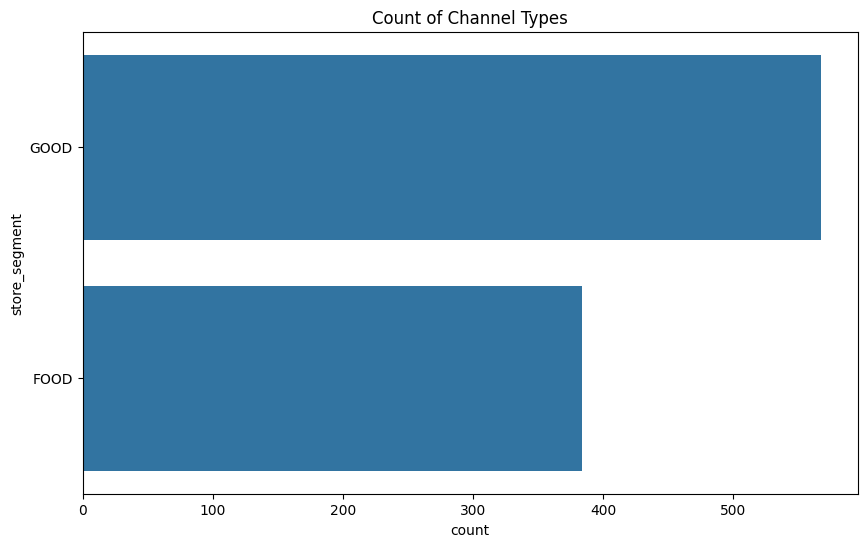

In [62]:
col_counts = stores['store_segment'].value_counts().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='count', y='store_segment', data=col_counts, orient='h')

# plt.xlabel('Channel Type')
# plt.ylabel('Count')
plt.title('Count of Channel Types')
plt.show()

## hubs

In [75]:
hubs.shape

(32, 6)

In [76]:
hubs.head()

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774


In [77]:
hubs.isnull().sum()

hub_id           0
hub_name         0
hub_city         0
hub_state        0
hub_latitude     0
hub_longitude    0
dtype: int64

In [63]:
for col in ['hub_city', 'hub_state']:
    print(f"Distinct values for column '{col}':")
    print(hubs[col].unique())
    print("-" * 50)

Distinct values for column 'hub_city':
['PORTO ALEGRE' 'RIO DE JANEIRO' 'SÃO PAULO' 'CURITIBA']
--------------------------------------------------
Distinct values for column 'hub_state':
['RS' 'RJ' 'SP' 'PR']
--------------------------------------------------


In [64]:
hubs['hub_state'] = hubs['hub_state'].replace(
                {'RS': 'Rio Grande do Sul',
                 'RJ': 'Rio de Janeiro',
                 'SP': 'São Paulo',
                 'PR': 'Paraná'})

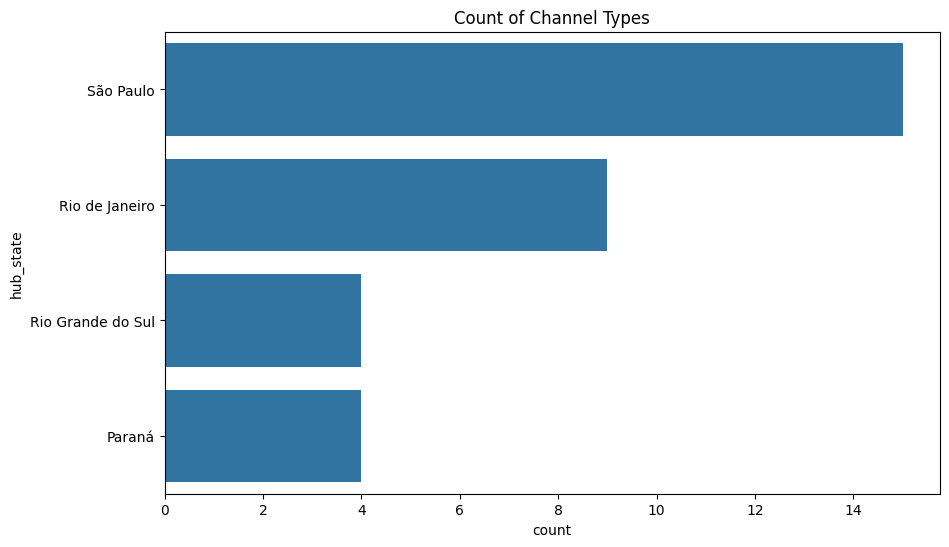

In [65]:
col_counts = hubs['hub_state'].value_counts().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='count', y='hub_state', data=col_counts, orient='h')

# plt.xlabel('Channel Type')
# plt.ylabel('Count')
plt.title('Count of Channel Types')
plt.show()

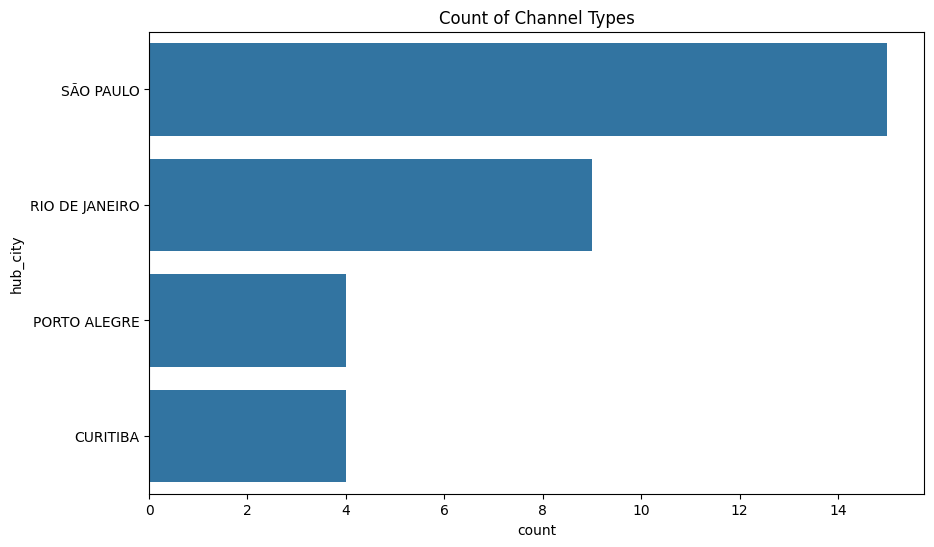

In [66]:
col_counts = hubs['hub_city'].value_counts().reset_index()
plt.figure(figsize=(10, 6)) 
sns.barplot(x='count', y='hub_city', data=col_counts, orient='h')

# plt.xlabel('Channel Type')
# plt.ylabel('Count')
plt.title('Count of Channel Types')
plt.show()

In [68]:
hubs['hub_city'].unique()

array(['PORTO ALEGRE', 'RIO DE JANEIRO', 'SÃO PAULO', 'CURITIBA'],
      dtype=object)

In [69]:
hubs['hub_state'].unique()

array(['Rio Grande do Sul', 'Rio de Janeiro', 'São Paulo', 'Paraná'],
      dtype=object)

In [72]:
print(hubs[hubs['hub_city'] == 'PORTO ALEGRE']['hub_state'].unique())
print(hubs[hubs['hub_city'] == 'RIO DE JANEIRO']['hub_state'].unique())
print(hubs[hubs['hub_city'] == 'SÃO PAULO']['hub_state'].unique())
print(hubs[hubs['hub_city'] == 'CURITIBA']['hub_state'].unique())

['Rio Grande do Sul']
['Rio de Janeiro']
['São Paulo']
['Paraná']


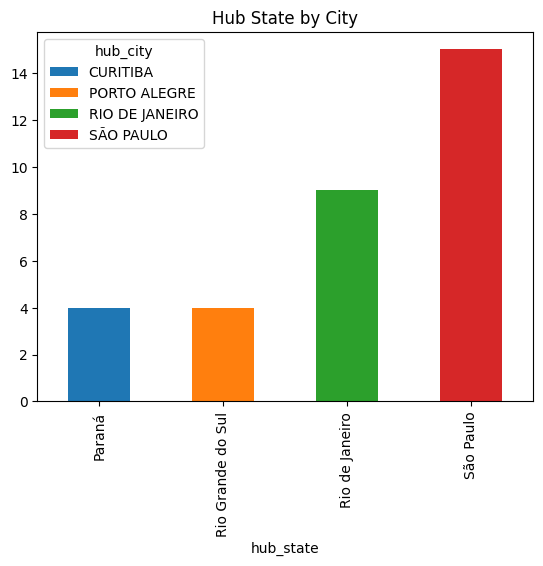

In [67]:
pd.crosstab(hubs['hub_state'], hubs['hub_city']).plot(kind='bar', stacked=True)
plt.title('Hub State by City')
plt.show()

## Save Dataframes

In [74]:
# channels.to_csv('./Dataset/processed_channels.csv', index=False)
drivers.to_csv('./Dataset/processed_drivers.csv', index=False)
hubs.to_csv('./Dataset/processed_hubs.csv', index=False)
orders.to_csv('./Dataset/processed_orders.csv', index=False)
payments.to_csv('./Dataset/processed_payments.csv', index=False)
stores.to_csv('./Dataset/processed_stores.csv', index=False)
deliveries.to_csv('./Dataset/processed_deliveries.csv', index=False)